In [ ]:
!wget -q https://storage.googleapis.com/open_source_datasets/ShelfImages.tar.gz
!tar xf ShelfImages.tar.gz

In [ ]:
!wget -q https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz
!tar xf GroceryDataset_part2.tar.gz

In [ ]:
!ls -lh ShelfImages | head -10
!ls -lh ShelfImages/train | head -10
!ls -lh ShelfImages/test | head -10

total 20K
drwxrwxr-x 2 1001 1001 4.0K Apr 14 10:10 test
drwxrwxr-x 2 1001 1001  16K Apr 14 10:10 train
total 456M
-rw-r--r-- 1 1001 1001  645K Oct 23  2019 C1_P01_N1_S2_1.JPG
-rw-r--r-- 1 1001 1001  2.1M Oct 23  2019 C1_P01_N1_S2_2.JPG
-rw-r--r-- 1 1001 1001  1.1M Oct 23  2019 C1_P01_N1_S3_1.JPG
-rw-r--r-- 1 1001 1001  870K Oct 23  2019 C1_P01_N1_S3_2.JPG
-rw-r--r-- 1 1001 1001  907K Oct 23  2019 C1_P01_N1_S5_1.JPG
-rw-r--r-- 1 1001 1001  2.1M Oct 23  2019 C1_P01_N2_S2_1.JPG
-rw-r--r-- 1 1001 1001  1.3M Oct 23  2019 C1_P01_N2_S3_1.JPG
-rw-r--r-- 1 1001 1001  1.1M Oct 23  2019 C1_P01_N2_S4_1.JPG
-rw-r--r-- 1 1001 1001  2.0M Oct 23  2019 C1_P01_N3_S2_1.JPG
total 101M
-rw-r--r-- 1 1001 1001 1.6M Oct 23  2019 C1_P02_N1_S5_1.JPG
-rw-r--r-- 1 1001 1001 2.3M Oct 23  2019 C1_P02_N2_S2_1.JPG
-rw-r--r-- 1 1001 1001 2.3M Oct 23  2019 C1_P02_N2_S3_1.JPG
-rw-r--r-- 1 1001 1001 1.3M Oct 23  2019 C1_P03_N1_S2_1.JPG
-rw-r--r-- 1 1001 1001 1.6M Oct 23  2019 C1_P03_N1_S3_1.JPG
-rw-r--r-- 1 1001 1001 2.4

In [ ]:
from imutils import paths
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

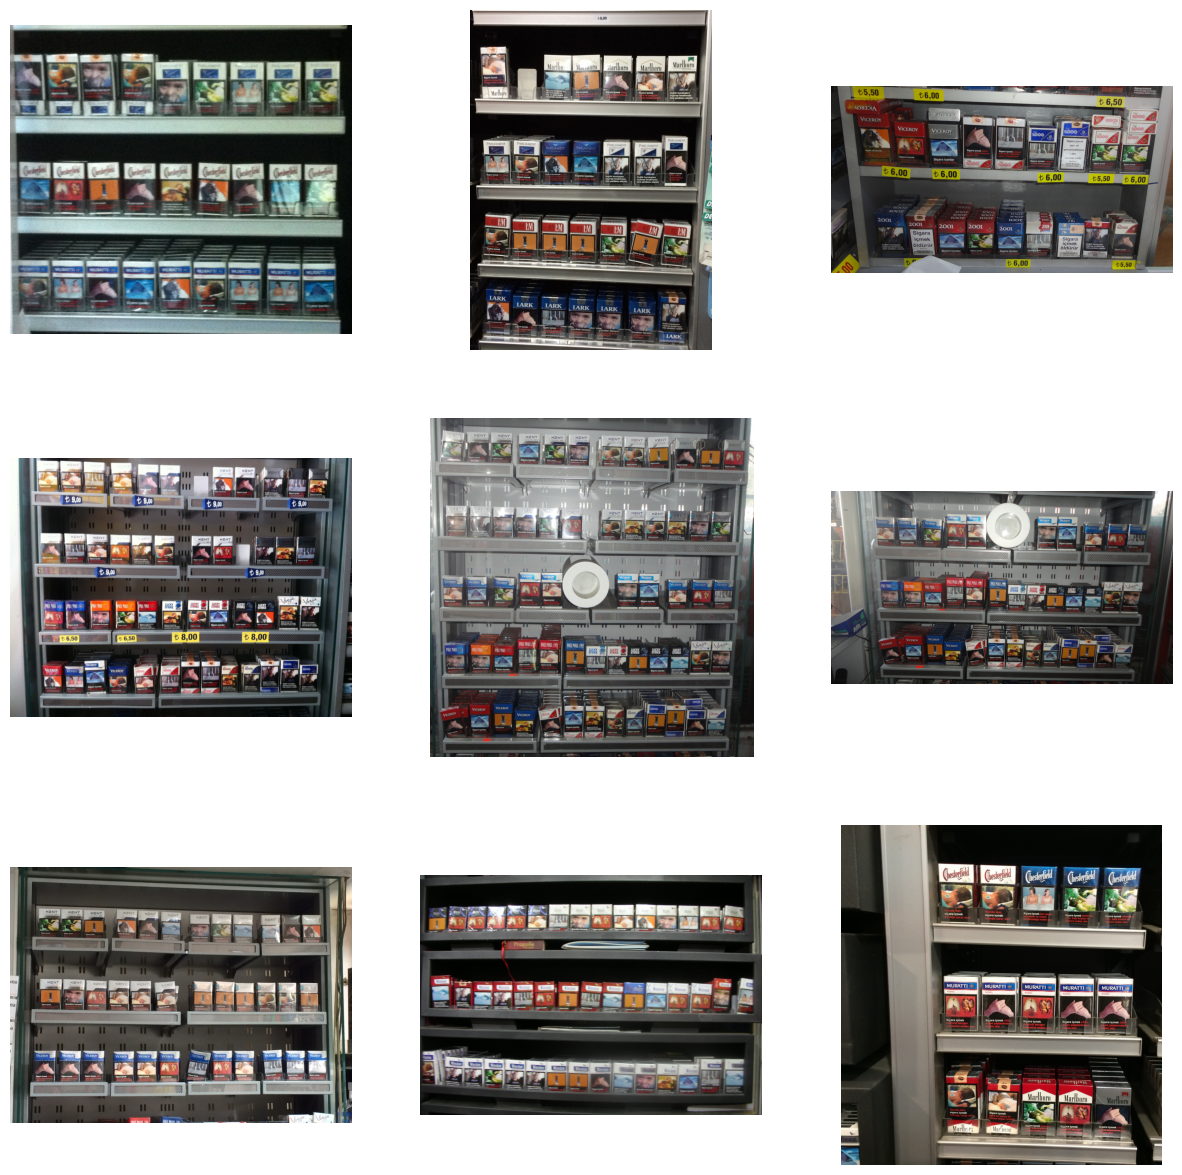

In [ ]:

train_images = list(paths.list_images("ShelfImages/train"))
plt.figure(figsize=(15, 15))
for i, image  in enumerate(train_images[:9]):
    image = plt.imread(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")

In [ ]:

cols = ["image_name", "x_i", "y_i", "w_i", "h_i", "b_i"]
master_df = pd.read_csv("https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotations.csv",
                        names=cols)
master_df.head()

,image_name,x_i,y_i,w_i,h_i,b_i
0,C1_P01_N1_S2_1.JPG,1008,1552,1260,1928,0
1,C1_P01_N1_S2_1.JPG,1028,928,1280,1304,0
2,C1_P01_N1_S2_1.JPG,24,872,268,1264,0
3,C1_P01_N1_S2_1.JPG,280,1568,532,1944,0
4,C1_P01_N1_S2_1.JPG,292,872,544,1248,0


In [ ]:

def vis_annotations(image_path: str, coordinate_list: List[List[int]],
                    color: str="blue") -> None:
    """Converts bounding box to matplotlib format, imposes it on the
    provided image and then displays the plot."""
    image = plt.imread(image_path)
    fig = plt.imshow(image)
    for i in range(len(coordinate_list)):
        bbox = coordinate_list[i]
        fig.axes.add_patch(plt.Rectangle(
            xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
            fill=False, edgecolor=color, linewidth=2))
    plt.show()

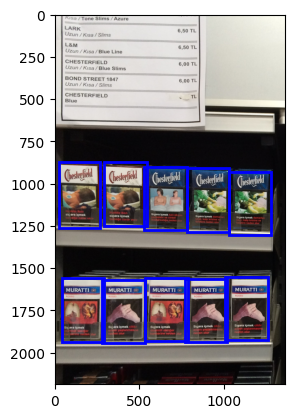

In [ ]:
coordinate_columns = master_df.columns[1:-1]
coordinate_list = master_df[master_df["image_name"]=="C1_P01_N1_S2_1.JPG"][coordinate_columns]
coordinate_list = coordinate_list.values.tolist()
vis_annotations("ShelfImages/train/C1_P01_N1_S2_1.JPG", coordinate_list)

In [ ]:
# Grab the image names belonging to the train and test sets
train_images = list(paths.list_images("ShelfImages/train"))
test_images = list(paths.list_images("ShelfImages/test"))
train_image_names = [image_path.split("/")[-1] for image_path in train_images]
test_image_names = [image_path.split("/")[-1] for image_path in test_images]
print(len(train_image_names), len(test_image_names))

283 71


In [ ]:

# Create two different dataframes from train and test sets
train_df = master_df[master_df["image_name"].isin(train_image_names)]
test_df = master_df[~master_df["image_name"].isin(train_image_names)]
print(len(np.unique(train_df["image_name"])), len(np.unique(test_df["image_name"])))

283 71


In [ ]:

# Let's turn the image names into absolute paths
train_df["image_name"] = train_df["image_name"].map(lambda x: "ShelfImages/train/" + x)
test_df["image_name"] = test_df["image_name"].map(lambda x: "ShelfImages/test/" + x)

<ipython-input-11-5339d736f7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["image_name"] = train_df["image_name"].map(lambda x: "ShelfImages/train/" + x)
<ipython-input-11-5339d736f7f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["image_name"] = test_df["image_name"].map(lambda x: "ShelfImages/test/" + x)


In [ ]:

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

!git clone https://github.com/tensorflow/models.git

% cd models/research
!pip install --upgrade pip
# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf1/setup.py .
!python -m pip install --use-feature=2020-resolver .

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.18.0
Cloning into 'models'...
remote: Enumerating objects: 99719, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 99719 (delta 55), reused 38 (delta 38), pack-reused 99641 (from 3)
Receiving objects: 100% (99719/99719), 626.60 MiB | 28.73 MiB/s, done.
Resolving deltas: 100% (72565/72565), done.
Updating files: 100% (3899/3899), done.


UsageError: Line magic function `%` not found.


In [ ]:

def prepare_df(original_df):
    df = pd.DataFrame()
    df["filename"] = original_df["image_name"]
    df["wdith"] = (original_df["x_i"] - original_df["w_i"]).astype("int")
    df["height"] = (original_df["y_i"] - original_df["h_i"]).astype("int")
    df["class"] = (original_df["b_i"] + 1).astype("int")
    df["xmin"] = (original_df["x_i"]).astype("int")
    df["ymin"] = (original_df["y_i"]).astype("int")
    df["xmax"] = (original_df["w_i"]).astype("int")
    df["ymax"] = (original_df["h_i"]).astype("int")
    return df

In [ ]:

new_train_df = prepare_df(train_df)
new_test_df = prepare_df(test_df)
print(len(np.unique(new_train_df["filename"])), len(np.unique(new_test_df["filename"])))

283 71


In [ ]:


# Serialize these dataframes
new_train_df.to_csv("train.csv", index=False)
new_test_df.to_csv("test.csv", index=False)

In [ ]:
!ls -lh *.csv

-rw-r--r-- 1 root root 172K Apr 14 10:18 test.csv
-rw-r--r-- 1 root root 693K Apr 14 10:18 train.csv


In [ ]:

!wget -q -O generate_tfrecord.py https://gist.githubusercontent.com/sayakpaul/d82a43c03089a8abfb5b042ee89eeb32/raw/fee76357235803c6a0d2d8859e72542c7a916340/generate_tfrecord.py


In [ ]:

!python generate_tfrecord.py \
    --csv_input=/content/models/research/train.csv \
    --output_path=/content/train.record
!python generate_tfrecord.py \
    --csv_input=/content/models/research/test.csv \
    --output_path=/content/test.record

!ls -lh *.record

2025-04-14 10:20:18.425355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744626018.451624    2838 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744626018.458910    2838 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/generate_tfrecord.py", line 20, in <module>
    from object_detection.utils import dataset_util
ModuleNotFoundError: No module named 'object_detection'
2025-04-14 10:20:24.800213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744626024.

In [ ]:
classes = new_train_df["class"].unique()
label_encodings = {}
for cls in classes:
    label_encodings[str(cls)] = int(cls)

f = open("/content/label_map.pbtxt", "w")

for (k, v) in label_encodings.items():
    item = ("item {\n"
            "\tid: " + str(v) + "\n"
            "\tname: '" + k + "'\n"
            "}\n")
    f.write(item)

f.close()

!cat /content/label_map.pbtxt

item {
	id: 1
	name: '1'
}
item {
	id: 2
	name: '2'
}
item {
	id: 5
	name: '5'
}
item {
	id: 8
	name: '8'
}
item {
	id: 4
	name: '4'
}
item {
	id: 7
	name: '7'
}
item {
	id: 11
	name: '11'
}
item {
	id: 3
	name: '3'
}
item {
	id: 6
	name: '6'
}
item {
	id: 9
	name: '9'
}
item {
	id: 10
	name: '10'
}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!mkdir /content/drive/MyDrive/product-detection
!cp -r *.record /content/drive/MyDrive/product-detection
!cp -r *.pbtxt /content/drive/MyDrive/product-detection

cp: cannot stat '*.record': No such file or directory


In [ ]:
# ✅ Clean install to avoid version issues
!pip install protobuf==3.20.3
!pip install tensorflow==2.16.1 tensorflow_hub

# ✅ Clone TensorFlow Models repo fresh
!rm -rf models
!git clone https://github.com/tensorflow/models.git


  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing insta

In [ ]:
# Download pretrained EfficientDet-D0 model
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz

# Copy the base pipeline.config
!cp efficientdet_d0_coco17_tpu-32/pipeline.config pipeline.config



--2025-04-14 10:36:58--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.135.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz.1’

efficientdet_d0_coc 100%[===================>]  29.31M  --.-KB/s    in 0.1s    

2025-04-14 10:36:58 (265 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz.1’ saved [30736482/30736482]

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_mode

In [ ]:
import re

pipeline_config = 'pipeline.config'

with open(pipeline_config) as f:
    config = f.read()

config = re.sub('fine_tune_checkpoint: ".*?"',
                'fine_tune_checkpoint: "efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0"', config)

config = re.sub('label_map_path: ".*?"',
                'label_map_path: "label_map.pbtxt"', config)

config = re.sub('input_path: ".*?train.*?"',
                'input_path: "train.record"', config)

config = re.sub('input_path: ".*?val.*?"',
                'input_path: "test.record"', config)

config = re.sub('batch_size: [0-9]+', 'batch_size: 4', config)

config = re.sub('num_steps: [0-9]+', 'num_steps: 2000', config)
config = re.sub('num_classes: [0-9]+', 'num_classes: 10', config)  # change 10 to your class count

with open(pipeline_config, 'w') as f:
    f.write(config)


In [ ]:
!python models/research/object_detection/model_main_tf2.py \
    --model_dir=training/ \
    --pipeline_config_path=pipeline.config \
    --num_train_steps=2000 \
    --alsologtostderr


python3: can't open file '/content/models/research/models/research/object_detection/model_main_tf2.py': [Errno 2] No such file or directory


In [ ]:
!pip install protobuf==3.20.3
!pip install tensorflow==2.15.0 tensorflow_hub


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:


In [ ]:
!rm -rf models
!git clone https://github.com/tensorflow/models.git

%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

!python object_detection/builders/model_builder_tf2_test.py


Cloning into 'models'...
remote: Enumerating objects: 99719, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 99719 (delta 55), reused 38 (delta 38), pack-reused 99643 (from 3)
Receiving objects: 100% (99719/99719), 626.60 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (72576/72576), done.
/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)


In [ ]:
!cd /content/models/research/object_detection
!ls


adversarial_text    cvt_text	   lstm_object_detection      README.md
attention_ocr	    deeplab	   marco		      rebar
audioset	    deep_speech    nst_blogpost		      seq_flow_lite
autoaugment	    delf	   object_detection	      setup.py
build		    efficient-hrl  object_detection.egg-info  slim
cognitive_planning  lfads	   pcl_rl		      vid2depth


In [ ]:
!git clone https://github.com/tensorflow/models.git
!cd models
!pip install -U .


Cloning into 'models'...
remote: Enumerating objects: 99719, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 99719 (delta 55), reused 38 (delta 38), pack-reused 99641 (from 3)
Receiving objects: 100% (99719/99719), 626.60 MiB | 29.47 MiB/s, done.
Resolving deltas: 100% (72576/72576), done.
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697324 sha256=5651d8b336b018abeac3db14e228a4b84ffd7ebd2cb7b64e39b57f22e6a8f449
  Stored in directory: /tmp/pip-ephem-wheel-cache-tj6fy4d5/wheels/95/4a/63/b2d36ca06eab841de19a38993ffaf2beac152a44539bc642a6
Successfully built object_detection
  Attempting uninstall: object_detection
    Found existing installation: object_detection 0.1
    Uninstalling object_detection-0.1:
      Successfully uninstalled object_detection-0.1
